# 1. Defining Problems

## eval_measure : WRMSE(Weighted Root Mean Squared Error)
$WRMSE = \sum\limits_{i=1}^{n}\sqrt{\dfrac{(y_i-\hat{y}_i)^2w_i}{\sum w_i}}$
- $y_i$ : i번째 실제 값(선수의 실제 OPS)
- $\hat{y}_i$ : i번째 예측값(선수의 예측된 OPS)
- $w_i$ : i번째 가중치(선수의 타수)
- $\sum w_i$ : 모든 가중치의 합(모든 선수들의 타수의 합)

-> 타수가 높을수록 더 큰 가중치를 가지기 때문에 주전 선수들의 성적을 예측하는 것이 더 중요할 것이다
 - 한 경기도 출전하지 못한 선수의 가중치는 0이 되므로 계산 결과도 0이 된다

# 2. EDA

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

# 맑은 고딕 이용
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

# 그래프에서 마이너스 기호가 표시되게하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
pd.DataFrame({
    '용어' : ['OBP', 'SLG', 'OPS', 'AB', 'BB', 'HBP', 'SF', 'AVG', '1B,2B,3B', 'HR, H'],
    '설명' : ['출루율(On Base Percentage), 타수 대비 아웃되지 않고 1루로 출루한 비율',
             '장타율(Slugging Percentage), 타수에서 기대되는 평균 루타', 
             '출루율과 장타율의 합(On base Plus Slugging)', 
             '타수(At Bat), 타자가 정규로 타격을 완료한 횟수', 
             '볼넷(Base on Balls), 볼을 네 번 얻어 출루한 경우', 
             '사구, 투수가 던진 공이 타자에 맞아 출루한 경우', 
             '희생 플라이(Sacrifice Fly), 타자 본인은 아웃이지만 주자를 진루시켜준 경우', 
             '타율(Batting Average), 타수 대비 안타 비율',
             '1루타, 2루타, 3루타. 한 번의 안타로 몇 루까지 진출했는지 표시', 
             '홈런, 안타(1B+2B+3B+HR)']
})

,용어,설명
0,OBP,"출루율(On Base Percentage), 타수 대비 아웃되지 않고 1루로 출루한 비율"
1,SLG,"장타율(Slugging Percentage), 타수에서 기대되는 평균 루타"
2,OPS,출루율과 장타율의 합(On base Plus Slugging)
3,AB,"타수(At Bat), 타자가 정규로 타격을 완료한 횟수"
4,BB,"볼넷(Base on Balls), 볼을 네 번 얻어 출루한 경우"
5,HBP,"사구, 투수가 던진 공이 타자에 맞아 출루한 경우"
6,SF,"희생 플라이(Sacrifice Fly), 타자 본인은 아웃이지만 주자를 진루시켜준 경우"
7,AVG,"타율(Batting Average), 타수 대비 안타 비율"
8,"1B,2B,3B","1루타, 2루타, 3루타. 한 번의 안타로 몇 루까지 진출했는지 표시"
9,"HR, H","홈런, 안타(1B+2B+3B+HR)"


## 2-1. 프리시즌 데이터 분석
한국 프로야구는 시즌 개막 전 약 2주동안 시범경기(프리시즌)을 치른다.

팀별로 5개 팀과 2차전까지 10경기를 치르며, 리그 전체에서 총 50경기를 진행한다.

In [3]:
# 프리시즌 데이터
preseason_df = pd.read_csv('datasets_kbo/Pre_Season_Batter.csv')
# 정규시즌 데이터
regular_season_df = pd.read_csv('datasets_kbo/Regular_Season_Batter.csv')
# 데이터 크기 확인
print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [4]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


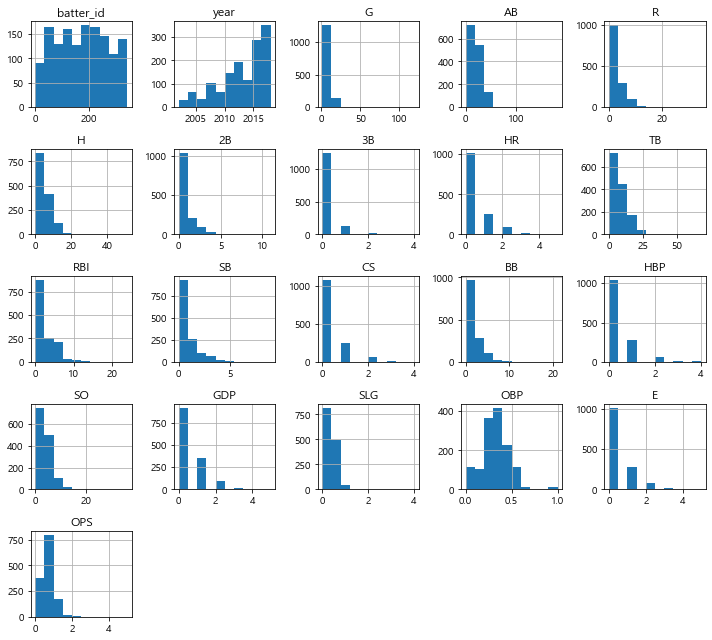

In [5]:
# 데이터 시각화
preseason_df.hist(figsize = (10, 9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

1. 2B, 3B, AB, BB, CS, SLG, R, TB에서 대부분의 값이 0에 가까운 낮은 값을 기록했음을 확인할 수 있다

-> 프리시즌의 경기 수가 적어서 나타나는 현상이라고 볼 수 있다

2. 2B, 3B, HBP 등을 보면 값의 범위가 매우 작게 형성되어 있다


3. 연도의 분포를 보면 과거의 데이터일수록 기록이 적음을 확인할 수 있다

분포를 살펴본 결과 프리시즌 데이터는 양이 부족한 상황임을 알 수 있는데, 정규시즌 데이터와 비교해서 객관적으로 탐색

In [6]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수 
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis = 1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


과거로 갈수록 프리시즌의 기록이 정규시즌의 기록보다 적어지는 것을 확인할 수 있다

In [7]:
# 프리시즌의 성적과 정규시즌의 성적 간의 상관관계(비교를 위해 두 데이터에 공통으로 존재하는 선수들의 기록만 사용)
# 이를 위해 선수와 연도 데이터를 이용해 새로운 열을 생성하고 새로운 열의 교집합을 이용해 두 데이터셋에 모두 존재하는 선수만 불러오는 방식 적용
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
intersection_idx

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop = True)

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop = True)

# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


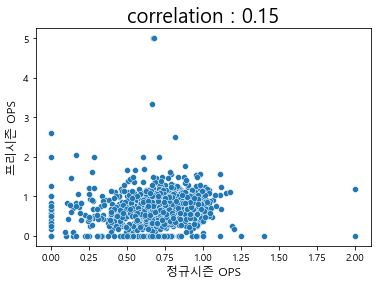

In [8]:
# 정규시즌과 프리시즌의 상관관계
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation : ' + str(np.round(correlation, 2)), fontsize = 20)
plt.xlabel('정규시즌 OPS', fontsize = 12)
plt.ylabel('프리시즌 OPS', fontsize = 12)
plt.show()

정규시즌과 프리시즌의 상관성이 아주 낮음을 확인할 수 있다.

EDA를 통해서 크게 2가지의 사실을 알아낼 수 있었음
1. 프리시즌 데이터의 경기 기록 수는 매우 적으므로 그 구성 역시 정규시즌 데이터와는 차이가 있을 수 있다
2. 프리시즌 데이터와 정규시즌 데이터와의 상관관계가 매우 낮다

--> 실제 분석에서는 프리시즌 데이터를 제외

## 2-2. 정규시즌 데이터 분석

프리시즌 데이터와 같은 방식으로 진행

In [9]:
display(regular_season_df.shape, regular_season_df.head())
regular_season_df.describe()

(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


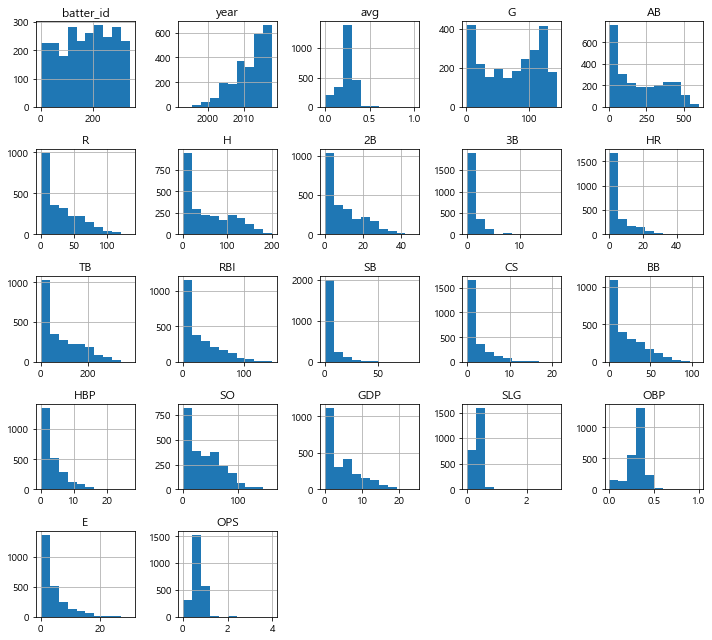

In [10]:
regular_season_df.hist(figsize = (10,9))
plt.tight_layout()
plt.show()

OPS를 보면 0~4 사이의 값을 갖고, 대부분의 값이 1 이하임을 확인할 수 있다

예측 대상이므로 boxplot을 통해서 더 자세하게 탐색

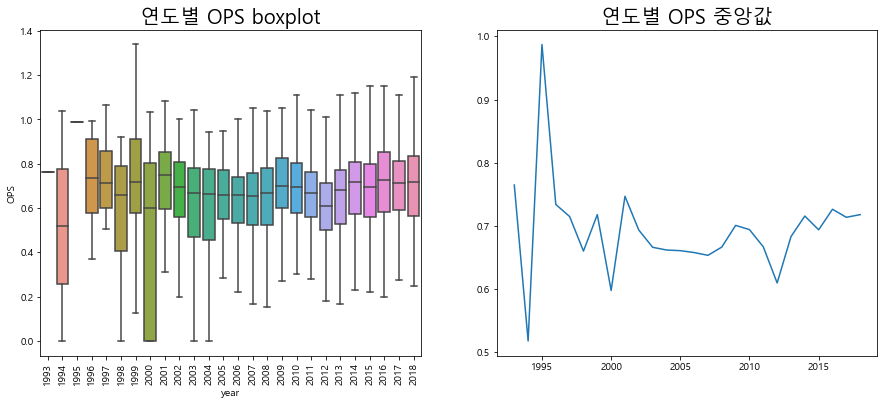

In [11]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
g = sns.boxplot(x = 'year', y = 'OPS', data = regular_season_df, showfliers = False)
g.set_title('연도별 OPS boxplot', size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

2000년 이전에는 변동이 상당히 크고, 그 이후로는 상대적으로 변동폭이 크지 않은 추세를 보인다.

연도에 따른 데이터의 수에 차이가 있음을 확인했으므로 연도별 OPS를 좀 더 자세히 탐색

In [12]:
pd.crosstab(regular_season_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


2000년도 이전에는 기록의 수가 20개 이하로 매우 적었기 때문에 변동 폭이 컸을 것이라고 판단할 수 있음 

**팀별 및 연도별 OPS 값 탐색(선수들의 성적은 팀의 성적에도 영향을 받을 수 있기 때문)**

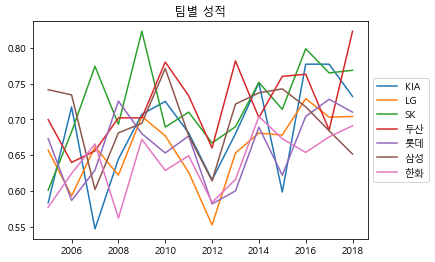

In [13]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index = ['team'], columns = 'year', values = 'OPS', aggfunc = 'median')

# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis = 1) == 0 

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
           loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('팀별 성적')
plt.show()

**키와 몸무게 변수를 이용해 성적과 연관성이 있는지 확인**

In [14]:
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

In [15]:
regular_season_df['height/weight']

0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object

In [16]:
regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x) # 정규 표현식 : /로 분리된 문자열의 2번째 section에서 숫자를 추출한 후 그 중 1번째 값 
    
regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)
                  
print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


몸무게를 키로 나눠 새로운 변수 생성. 이 값이 크면 키에 비해 몸무게가 많이 나가며 힘이 셀 것이고, 작으면 키에 비해 몸무게가 적게 나가므로 스피드가 빠를 것이라고  추측할 수 있다.

**따라서 계산한 값이 크다면 힘과 연관성이 높은 장타율과의 상관관계를 보고, 값이 작을 때는 스피드와 연관성이 높은 출루율과의 상관관계를 확인**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


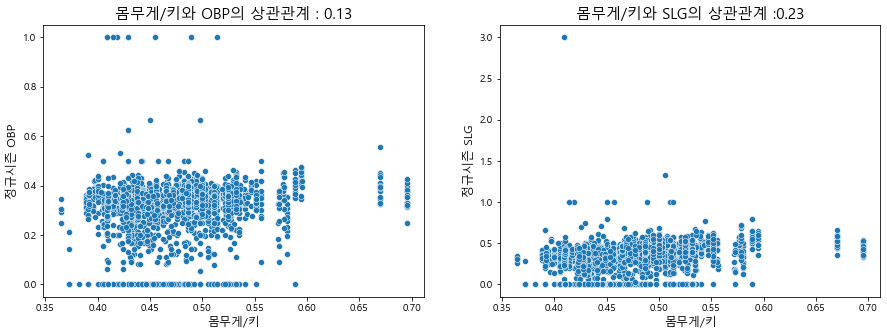

In [17]:
# 몸무게/키 계산
regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)

# 몸무게/키와 출루율의 상관관계 계산
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title("몸무게/키와 OBP의 상관관계 : " + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 OBP', fontsize  = 12)
plt.xlabel('몸무게/키', fontsize = 12)

plt.subplot(1,2,2)
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])
plt.title('몸무게/키와 SLG의 상관관계 :' + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 SLG', fontsize = 12)
plt.xlabel('몸무게/키', fontsize = 12)
plt.show()

데이터는 선형적인 모습을 띠지 않으며, 고르게 분포되어있다.(상관계수가 매우 낮다.)

이는 몸무게/키가 장타율과 출루율에 큰 영향을 끼치지 않음을 의미한다.

**포지션과 관련한 기록**

In [18]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

포지션을 의미하는 단어와 주로 사용하는 손을 의미하는 단어가 섞여있으므로 이 둘을 분리

In [19]:
# position
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x : x.split('(')[0] if pd.notnull(x) else x)

# 우타or좌타or양타
regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x : x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


{'내야수': 'n : 827', '외야수': 'n : 622', '포수': 'n : 203'}


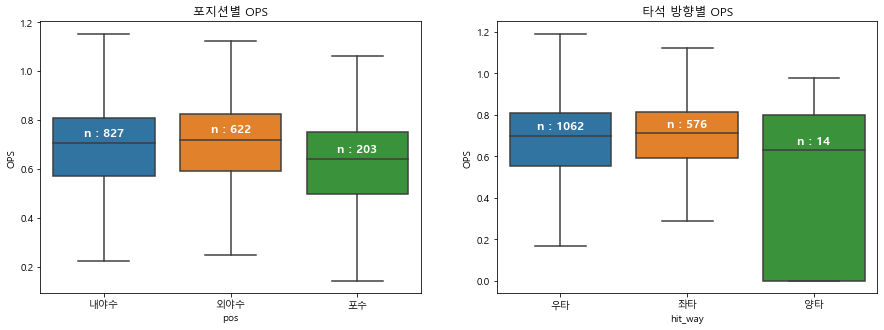

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
ax = sns.boxplot(x = 'pos', y ='OPS', data = regular_season_df, showfliers = False)

# position별 OPS 중앙값
medians = regular_season_df.groupby('pos')['OPS'].median().to_dict()

# position별 관측치 수 
nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n : 값' 형식으로 변환
for key in nobs :
    nobs[key] = 'n : ' + str(nobs[key])
print(nobs)

# 그래프의 xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치. label은 그에 해당하는 label 값 
for label in ax.get_xticklabels() : 
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)
ax = sns.boxplot(x = 'hit_way', y = 'OPS', data = regular_season_df, showfliers = False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby('hit_way')['OPS'].median().to_dict()

# 타자 방향별 관측치 수 
nobs = regular_season_df['hit_way'].value_counts().to_dict()

# 키 값을 'n :값' 형식으로 변환
for key in nobs : 
    nobs[key] = 'n : ' + str(nobs[key])

# 그래프의 xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text값
for label in ax.get_xticklabels() : 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
    nobs[label.get_text()], horizontalalignment = 'center', size = 'large',
    color = 'w', weight = 'semibold')

ax.set_title('타석 방향별 OPS')

plt.show()

포지션별 OPS를 살펴본 결과 내야수와 외야수의 성적은 큰 차이가 없음을 확인할 수 있다. 하지만 포수의 OPS는 다른 포지션보다 다소 수치가 낮음을 확인할 수 있다. 즉, 포수를 제외하고는 포지션의 영향이 그렇게 크지 않음을 알 수 있다.

또한 타자가 어느 손을 쓰는지도 크게 영향을 미치지 않음을 알 수 있으며, 양타의 경우 OPS가 낮은 경향은 있지만 관측치가 14개밖에 되지 않기 때문에 신뢰할만한 결과라고 볼 수 없다.


**외국인과 내국인 구별**

한국인은 초등학교, 중학교, 고등학교에 대한 정보를 보유하고 있으며 외국인은 국가와 대학 순서로 정보를 보유하고 있다.

한국인의 경우 각 학교의 이름이 '-'로 구분되어 있지만 외국인은 그렇지 않기 때문에 '-'을 공백으로 대체하고 공백을 기준으로 데이터를 나눈다.

In [21]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [22]:
# career를 split
foreign_country = regular_season_df['career'].apply(
    lambda x: x.replace('-', ' ').split(' ')[0])

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x: np.nan if '초' in x else x)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['네덜란드', '캐나다', '미국', '쿠바', '도미니카']

네덜란드, 쿠바, 도미니카, 캐나다, 미국 국적을 가진 선수들이 명단에 있음을 확인할 수 있고, 해당 국가의 국적에 속하는 선수들은 외국인으로 구분. 이를 기준으로 내국인과 외국인 선수들의 성적을 비교

In [23]:
regular_season_df['country'] = foreign_country
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x: x if pd.isnull(x)
                else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


외국인 선수와 내국인 선수의 성적 시각화를 통해 비교

{'korean': 2416, 'foreign': 38}


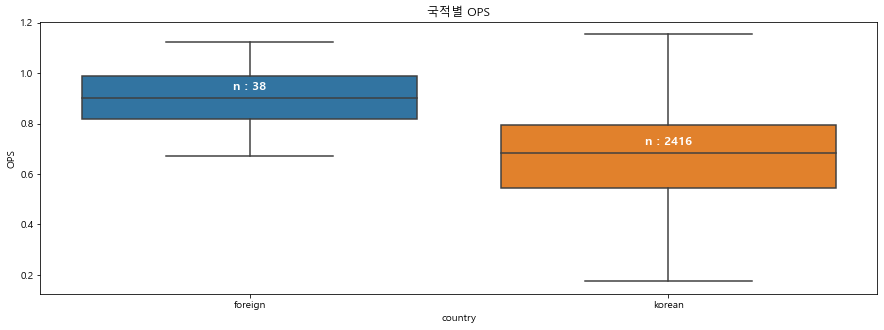

In [24]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'country', y = 'OPS', data = regular_season_df, showfliers = False)

# 국적별 OPS 중앙값 dict
medians = regular_season_df.groupby('country')['OPS'].median().to_dict()

# 내,외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
print(nobs)
# 키 값을 {n : 값} 형식으로 변환
for key in nobs : 
    nobs[key] = "n : " + str(nobs[key]) 

# 그래프의 xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels() : 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            nobs[label.get_text()],
            horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('국적별 OPS')
plt.show()

비교 결과 외국인 선수들이 평균적으로 내국인 선수보다 OPS 성적이 좋은 경향을 보인다.

외국인 선수의 수가 많지는 않지만, 명확한 차이가 있다고 볼 수 있다.

**`starting salary`라고 표시된 첫 연봉 탐색**

In [25]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
6500만원       10
33000만원      10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

`달러`와 `만원`이 섞여있다. 달러로 연봉을 받았다면 외국인 선수로 생각할 수 있고 국적은 앞에서 확인했기 때문에 만원 단위를 가진 첫 연봉이 데이터만 탐색

In [26]:
# 결측치라면 그대로 0으로 두고 '만원'이 포함되어 있으면 숫자만 뽑아서 초봉으로 넣어주기
# 그 외 만원 단위가 아닌 초봉은 결측치로 처리
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x)
                else (int(re.findall('\d+', x)[0]) if '만원' in x else np.nan))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


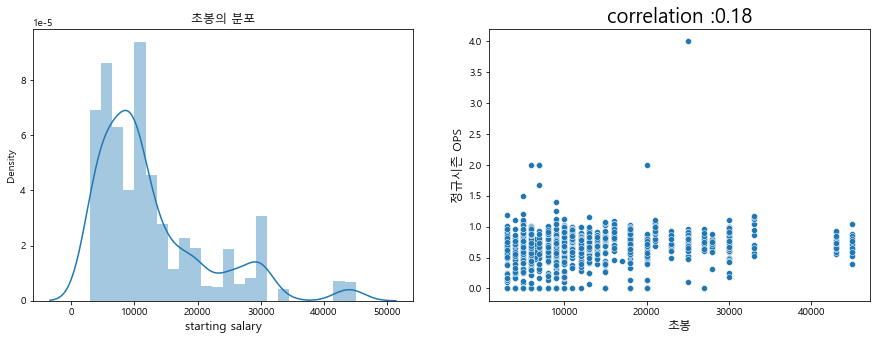

In [27]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
b = sns.distplot(regular_season_df['starting_salary'].loc[regular_season_df['starting_salary'].notnull()], hist = True)
b.set_xlabel('starting salary', fontsize = 12)
b.set_title('초봉의 분포', fontsize = 12)

plt.subplot(1,2,2)
# 초봉과 OPS의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation :' + str(round(correlation, 2)), fontsize  = 20)
b.set_ylabel('정규시즌 OPS', fontsize = 12)
b.set_xlabel('초봉', fontsize = 12)
plt.show()

확인 결과 첫 연봉과 성적은 큰 상관성을 보이지 않는다.

### 정규 시즌 데이터 탐색 결과
OPS 성적과 높은 상관성을 띠는 변수가 부족하다. 외국인 선수들의 OPS 성적이 다소 높은 경향은 있지만 외국인 선수는 매해 명단이 달라지며 수도 매우 부족해서 분석에 적용하기에는 한계가 있다. 

-> 주어진 데이터를 그대로 활용하는 것보다는 다른 차원에서의 접근이 필요함을 알 수 있다.

## 2-3. 일별 데이터 분석
정규시즌 데이터는 연도별로 선수의 성적을 종합해 기록하는 반면, 일별 데이터는 매일의 경기 기록을 보유하고 있다.

In [28]:
day_by_day_df = pd.read_csv('datasets_kbo/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


날짜를 보면 월과 일이 같이 표시되어있기 때문에 `date`라는 이름의 변수를 통해서 정확한 월 및 일 변수를 추가해야 한다.

In [29]:
# 날짜(date)를 '.'을 기준으로 나누고 첫 번재 값을 월(month)로 지정
day_by_day_df['month'] = day_by_day_df['date'].apply(
    lambda x: str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(ave2) 계산
agg_df = day_by_day_df.groupby(['year','month'])['avg2'].mean().reset_index()
agg_df

# pivot table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index = 'month', columns = 'year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


월을 계산한 이후 연도별 월별 데이터 현황을 살펴본 결과 결측치가 존재하는 것이 가장 눈에 띄는데, 3월과 10월에만 존재하는 것으로 보아 연도마다 시즌의 시작일과 종료일이 다르기 때문이라고 추측할 수 있다.

선수들의 연도와 월별 성적 변화를 더 정확히 보기 위해 시각화 작업 진행(3월과 10월의 성적은 제외하고 최근 연도의 데이터만 이용)

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


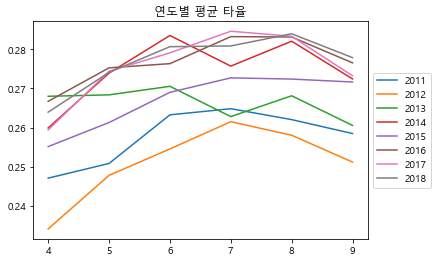

In [30]:
display(agg_df.iloc[2:, 10:]) # 2011년 ~ 2018년의 데이터만 이용
plt.plot(agg_df.iloc[2:, 10:])
plt.legend(agg_df.iloc[2:,10:].columns, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('연도별 평균 타율')
plt.show()

시즌 시작 직후에는 대부분 성적이 높지 않지만 5~6월에 접어들면서 어느 정도 안정화되고 있다. 상반기까지의 성적을 예측하는 대회라는 것을 고려하면 중요한 단서가 될 수 있다.

## 3. 데이터 전처리

In [31]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,0,1076,26,0,802,802,802,802,802,0


In [32]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,0,1076,26,0,802,802,802,802,802,0


확인 결과, 타율(avg), 장타율(SLG), 출루율(OBP) 등의 변수에 결측치가 존재한다.

데이터 타입에 따라서 결측치 처리 방법이 달라질 수 있기 때문에 수치형 타입의 변수만 따로 추출해서 결측치를 처리

수치형 타입 변수의 결측치 현황을 확인하기 위해 결측치가 존재하는 행을 출력

In [33]:
# 수치형 타입의 변수 저장
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = regular_season_df.select_dtypes(include = numerics).columns

regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis = 1) > 0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


변수 G는 선수가 뛴 경기 수를 의미하는데, 뛴 경기 수가 적어 성적을 산출하지 못하는 경우에 결측치가 발생한다.

따라서 정규시즌, 일별 데이터, 프리시즌 결측치를 모두 0으로 대체하는 것이 좋은 방법이다.

In [36]:
# 수치형 변수에 포함되는 데이터 타입 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터에서 결측치를 0으로 대체
regular_season_df[regular_season_df.select_dtypes(include = numerics).columns] = \
regular_season_df[regular_season_df.select_dtypes(include = numerics).columns].fillna(0)
regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,가르시아2018,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000.0,0.000,강경학2011,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000.0,0.686,강경학2014,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000.0,0.673,강경학2015,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000.0,0.489,강경학2016,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2014,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2015,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000.0,0.000,황진수2016,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000.0,0.761,황진수2017,82.0,181.0,0.453039,내야수,양타,korean


In [37]:
# 일별 데이터에서 결측치 모두 0으로 대체
day_by_day_df[day_by_day_df.select_dtypes(include = numerics).columns] = \
day_by_day_df[day_by_day_df.select_dtypes(include = numerics).columns].fillna(0)
day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


**수치형 변수가 아닌 데이터의 결측치 확인**

In [39]:
# 수치형이 아닌 변수 추출
not_num_cols = [x for x in regular_season_df.columns if x not in num_cols]

# 수치형이 아닌 변수 중 결측치가 하나라도 존재하는 행 출력
regular_season_df.loc[regular_season_df[not_num_cols].isna().sum(axis=1) > 0,not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,new_idx,pos,hit_way,country
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2005,NaN,NaN,korean
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2006,NaN,NaN,korean
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2007,NaN,NaN,korean
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2008,NaN,NaN,korean
16,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,백승룡2011,NaN,NaN,korean


키와 몸무게, 포지션, 초봉 등에 결측치가 존재하는데, 필요한 경우 데이터를 내려받거나 크롤링을 통해 보완할 수 있지만, 이 변수들은 분석에 사용하지 않을 것이기 때문에 따로 결측치 처리는 하지 않을 예정